In [226]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [227]:
emails = {
    'email': [
        "Compre agora a oferta grátis",  # SPAM
        "Clique aqui para ganhar prêmio",  # SPAM
        "Reunião agendada para segunda",  # NÃO SPAM
        "Oferta exclusiva para você",  # SPAM
        "Vamos almoçar amanhã?",  # NÃO SPAM
        "Grátis: sua consulta médica",  # SPAM
        "Confirme sua inscrição no evento",  # NÃO SPAM
        "Grátis, clique aqui para baixar",  # SPAM
        "Atualização importante do projeto",  # NÃO SPAM
        "Oferta limitada, clique e ganhe",  # SPAM
        "Parabéns, você foi selecionado",  # SPAM
        "Relatório final enviado",  # NÃO SPAM
        "Sua fatura vence hoje",  # NÃO SPAM
        "Ganhe dinheiro rápido e fácil",  # SPAM
        "Aceite nossa oferta especial",  # SPAM
        "Vamos discutir aquele contrato?",  # NÃO SPAM
        "Última chance de participar",  # SPAM
        "A reunião foi adiada para terça",  # NÃO SPAM
        "Inscreva-se agora e ganhe bônus",  # SPAM
        "Confirmação de pagamento recebida",  # NÃO SPAM
        "Presente grátis para você",  # SPAM
        "Desconto exclusivo, compre agora",  # SPAM
        "Proposta de parceria",  # NÃO SPAM
        "Seu pedido foi enviado",  # NÃO SPAM
        "Ganhe prêmios ao clicar aqui",  # SPAM
        "Agende sua consulta",  # NÃO SPAM
    ],
    'label': [
        'spam', 'spam', 'não spam', 'spam', 'não spam',
        'spam', 'não spam', 'spam', 'não spam', 'spam',
        'spam', 'não spam', 'não spam', 'spam', 'spam',
        'não spam', 'spam', 'não spam', 'spam', 'não spam',
        'spam', 'spam', 'não spam', 'não spam', 'spam',
        'não spam',
    ]
}


In [228]:
df = pd.DataFrame(
    {'email': emails['email']}
    )
df.head()

,email
0,Compre agora a oferta grátis
1,Clique aqui para ganhar prêmio
2,Reunião agendada para segunda
3,Oferta exclusiva para você
4,Vamos almoçar amanhã?


In [229]:
vetorizar = CountVectorizer()
X_vetorized = vetorizar.fit_transform(df['email'])

In [230]:
X_dense = X_vetorized.toarray()
X_dense[0:5]

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0],
    

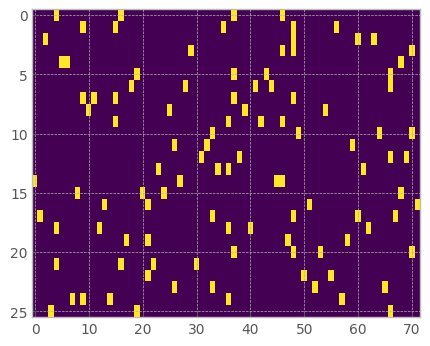

In [231]:
# Visualização com Matplotlib
plt.figure(figsize=(5, 4))
plt.imshow(X_dense, cmap='viridis', aspect='auto')
plt.show()

In [232]:
num_cluster = 2

# CRIAÇÃO DO MODELO
modelo = KMeans(n_clusters=num_cluster, random_state=42)

# TREINAR O MODELO
modelo.fit(X_vetorized)

# PREVER O MODELO
cluster = modelo.predict(X_vetorized)

# acionar no nosso data frame:
df['cluster'] = cluster

In [233]:
df['cluster'].value_counts()

cluster
0    23
1     3
Name: count, dtype: int64

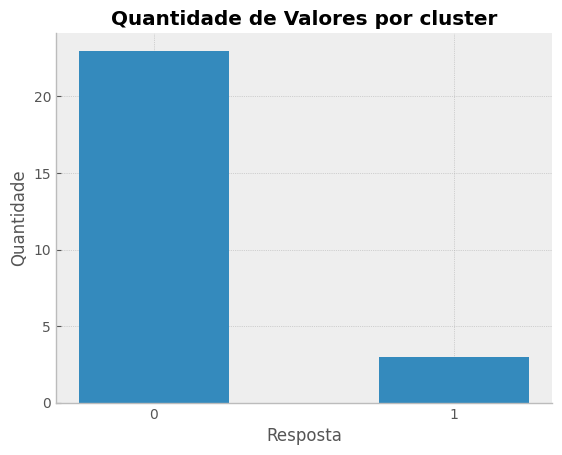

In [234]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ax.bar(
    x=['0','1'],
    height=df['cluster'].value_counts(),
    width=.5,
    )

ax.set_title(
    'Quantidade de Valores por cluster',
    weight='bold'
    )

ax.set_xlabel('Resposta')
ax.set_ylabel('Quantidade')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(ls=':')

In [235]:
from pyclustering.cluster.kmedoids import kmedoids

X_vetorized = vetorizar.fit_transform(df['email']).toarray()

num_cluster = 2

# Usa-se os dois primeiros pontos:
initial_medois = [0,1]

# treinamento
kmedoid_instance = kmedoids(X_vetorized, initial_medois)

# executar o algoritmo:
kmedoid_instance.process()

cluster = kmedoid_instance.get_clusters()
medoids = kmedoid_instance.get_medoids()


In [236]:
pd.DataFrame(cluster)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,1,2,3,7,10,17,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,5,6,8,9,11,12,13,14.0,15.0,16.0,18.0,19.0,21.0,22.0,23.0,24.0,25.0


In [237]:
pd.DataFrame(medoids)

,0
0,20
1,25


In [238]:
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score 

In [239]:
X_vetorized = vetorizar.fit_transform(df['email']).toarray()

num_cluster = 2

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_vetorized.T, num_cluster, 2, error=0.005, maxiter=1000, init=None)